<a href="https://colab.research.google.com/github/aboelela924/Deep-learning-with-TF2-and-Keras/blob/master/Deep_learning_with_TF2_and_Keras_chapter_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

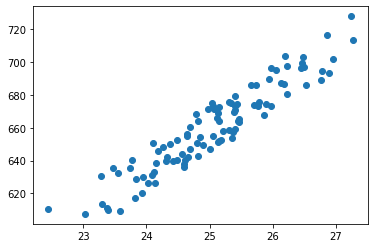

In [ ]:
np.random.seed(0)
area = np.random.randn(100)+25
price = 25*area + np.random.randint(20,50, size=len(area))

data = np.array([area, price])
data = pd.DataFrame(data=data.T, columns=["area", "price"])

plt.scatter(data["area"], data["price"])
plt.show()

In [ ]:
w = sum(price*(area - np.mean(area))) / sum((area - np.mean(area))**2)
b = np.mean(price) - w * np.mean(area)
print(w)
print(b)

24.538860130713502
45.416076592628315


In [ ]:
y_pred = w * area + b

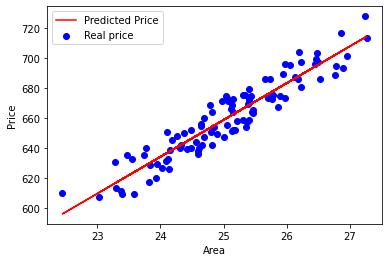

In [ ]:
plt.plot(area, y_pred, color="red", label="Predicted Price")
plt.scatter(data['area'], data['price'], color="blue", label="Real price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [ ]:
import tensorflow as tf 
from tensorflow import feature_column as fc 

numeric_column = fc.numeric_column
categorical_column_with_vocabulary_list = fc.categorical_column_with_vocabulary_list

In [ ]:
featcols = [
            tf.feature_column.numeric_column("area"),
            tf.feature_column.categorical_column_with_vocabulary_list("type", ["bungalow","apartment"])
]

In [ ]:
def train_input_function():
    features = {
        "area": [1000, 2000, 4000, 1000, 2000, 4000],
        "type": ["bungalow", "bungalow", "house", "apartment", "apartment", "apartment"]
    }
    labels = [500, 1000, 1500, 700, 1300, 1900]
    return features, labels

In [ ]:
model = tf.estimator.LinearRegressor(featcols)
model.train(train_input_function, steps=200)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpihhbbc3y', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


In [ ]:
def predict_input_function():
    features = {"area":[1500, 1800],
                "type":["house", "apt"]}
    return features

In [ ]:
prediction = model.predict(predict_input_function)
print(next(prediction))
print(next(prediction))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpihhbbc3y/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([692.7829], dtype=float32)}
{'predictions': array([830.9035], dtype=float32)}


<h1>Boston housing price dataset</h1>

In [ ]:
import tensorflow as tf 
import pandas as pd 
import tensorflow.feature_column as fc
from tensorflow.keras.datasets import boston_housing 

(x_train, y_train), (x_test, y_test) =  boston_housing.load_data()
features = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX",
            "PTRATIO","B","LSTAT"]

x_train_df = pd.DataFrame(x_train, columns=features)
y_train_df = pd.DataFrame(y_train, columns=["MEDV"])
x_test_df = pd.DataFrame(x_test, columns=features)
y_test_df = pd.DataFrame(y_test, columns=["MEDV"])

x_train_df.head()

57344/57026 [==============================] - 0s 0us/step


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [ ]:
features_columns = []
for feature_name in features:
    features_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

In [ ]:
def estimator_input(df_data, df_labels, batch_size=32, shuffle=True, epochs=10):
    def input_data_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_labels))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_data_fn

In [ ]:
train_input_fn = estimator_input(x_train_df, y_train_df)
test_input_fn = estimator_input(x_test_df, y_test_df, epochs=1, shuffle=False)

linear_estimator = tf.estimator.LinearRegressor(features_columns,
                                                model_dir = '/content/logs/func/')
linear_estimator.train(train_input_fn,steps=100)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/content/logs/func/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warnin

In [ ]:
result = linear_estimator.predict(test_input_fn)
for pred, exp in zip(result, y_test[:32]):
    print(f"prediction: {pred['predictions'][0]}, true value: {exp}")
    # print("\n****************************************\n")

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/logs/func/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
prediction: 2.24141001701355, true value: 7.2
prediction: 21.478092193603516, true value: 18.8
prediction: 20.495332717895508, true value: 19.0
prediction: 21.530052185058594, true value: 27.0
prediction: 21.05384063720703, true value: 22.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/logs/func

<h1>MNIST</h1>

In [10]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
print(tf.__version__)

2.3.0


In [11]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)


In [12]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn({"x":train_data}, 
                                                              train_labels, 
                                                              batch_size=32, 
                                                              num_epochs=None, 
                                                              shuffle=True) 

test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn({"x": test_data}, 
                                                              test_labels, 
                                                              batch_size=32, 
                                                              num_epochs=None,
                                                              shuffle=False)

classifier = tf.estimator.LinearClassifier(feature_columns=feature_columns,
                                           n_classes=10,
                                           model_dir="/content/log/mnist")



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/content/log/mnist', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
classifier.train(input_fn=train_input_fn, steps=10)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/log/mnist/model.ckpt-10
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 10...
INFO:tensorflow:Saving checkpoints for 10 into /content/log/mnist/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 10...
INFO:tensorflow:loss = 1.7798452, step = 10
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 20...
INFO:tensorflow:Saving checkpoints for 20 into /content/log/mnist/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 20...
INFO:tensorflow:Loss for final step: 0.84493935.


In [14]:
results = classifier.evaluate(input_fn=test_input_fn, steps=10)
print(results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-09-22T11:19:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /content/log/mnist/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Inference Time : 0.14060s
INFO:tensorflow:Finished evaluation at 2020-09-22-11:19:43
INFO:tensorflow:Saving dict for global step 20: accuracy = 0.81875, average_loss = 0.64518625, global_step = 20, loss = 0.64518625
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20: /content/log/mnist/model.ckpt-

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/logs/mnist